Setup and import the data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("student_exam_scores.csv")
print(data.head())


  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


Initial Exploration & standardize format 

In [35]:
print(data.shape)
print(data.columns)
data.head()
data.info()
print(data.describe())

(200, 6)
Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   

In [36]:
data.rename(columns={'student_id':'Student_id'},inplace=True)
data.rename(columns={'hours_studied':'Hours_Studied'},inplace=True)
data.rename(columns={'sleep_hours':'Sleep_Hours'},inplace=True)
data.rename(columns={'attendance_percent':'Attendance_Percent'},inplace=True)
data.rename(columns={'previous_scores':'Previous_Scores'},inplace=True)
data.rename(columns={'exam_score':'Exam_Score'},inplace=True)

Overall Analysis

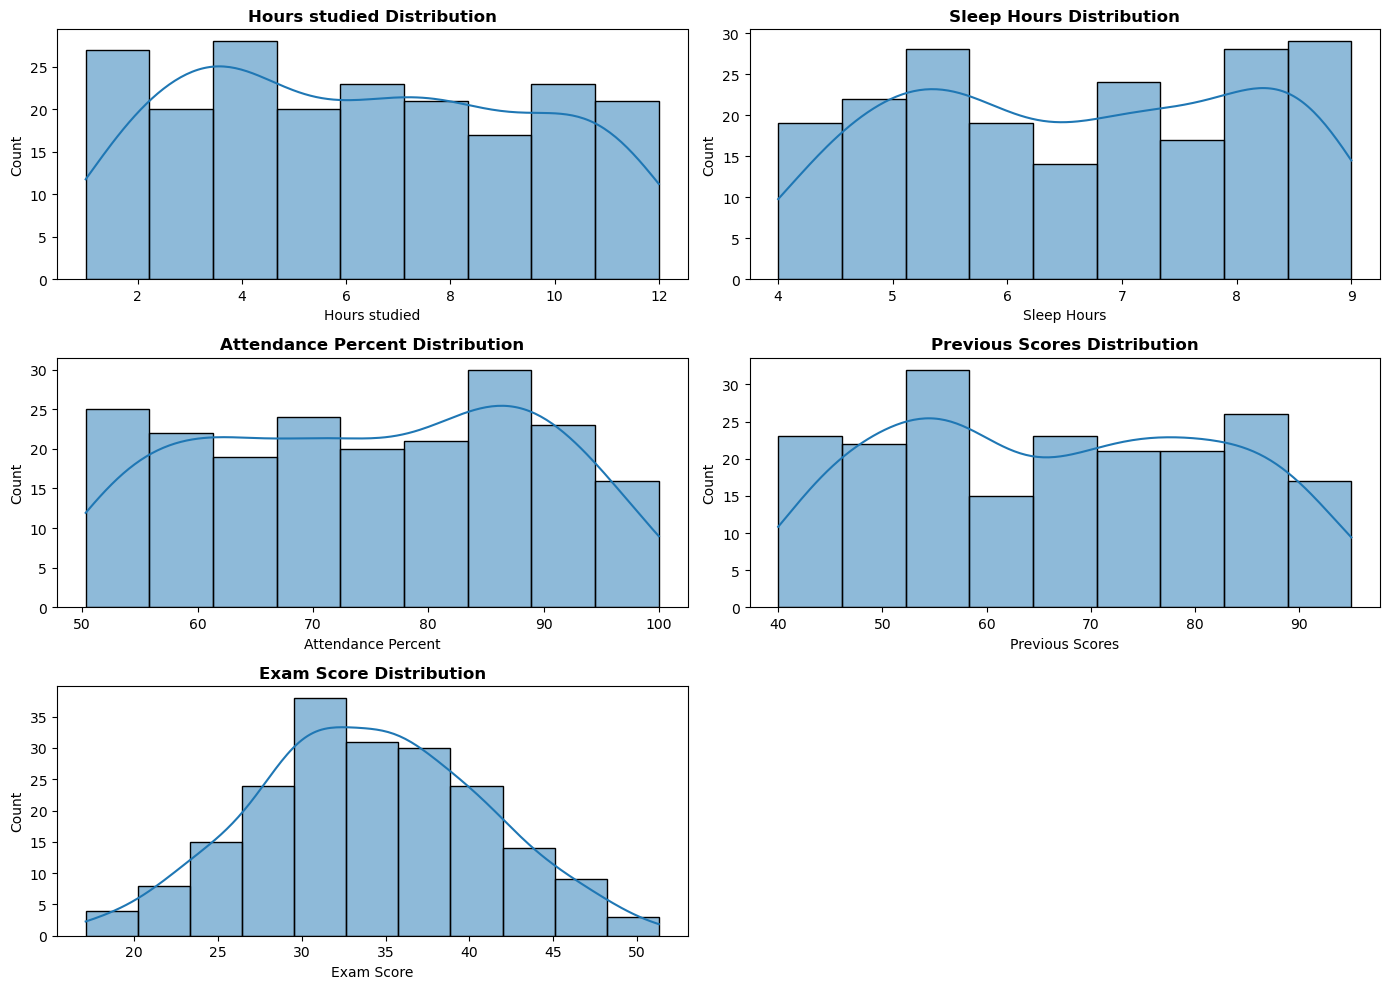

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
sns.histplot(data,x='Hours_Studied',kde='True',edgecolor='black')
plt.title('Hours studied Distribution',fontweight='bold')
plt.xlabel('Hours studied')
plt.ylabel('Count')

plt.subplot(3,2,2)
sns.histplot(data,x='Sleep_Hours',kde='True',edgecolor='black')
plt.title('Sleep Hours Distribution',fontweight='bold')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')

plt.subplot(3,2,3)
sns.histplot(data,x='Attendance_Percent',kde='True',edgecolor='black')
plt.title('Attendance Percent Distribution',fontweight='bold')
plt.xlabel('Attendance Percent')
plt.ylabel('Count')

plt.subplot(3,2,4)
sns.histplot(data,x='Previous_Scores',kde='True',edgecolor='black')
plt.title('Previous Scores Distribution',fontweight='bold')
plt.xlabel('Previous Scores')
plt.ylabel('Count')

plt.subplot(3,2,5)
sns.histplot(data,x='Exam_Score',kde='True',edgecolor='black')
plt.title('Exam Score Distribution',fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

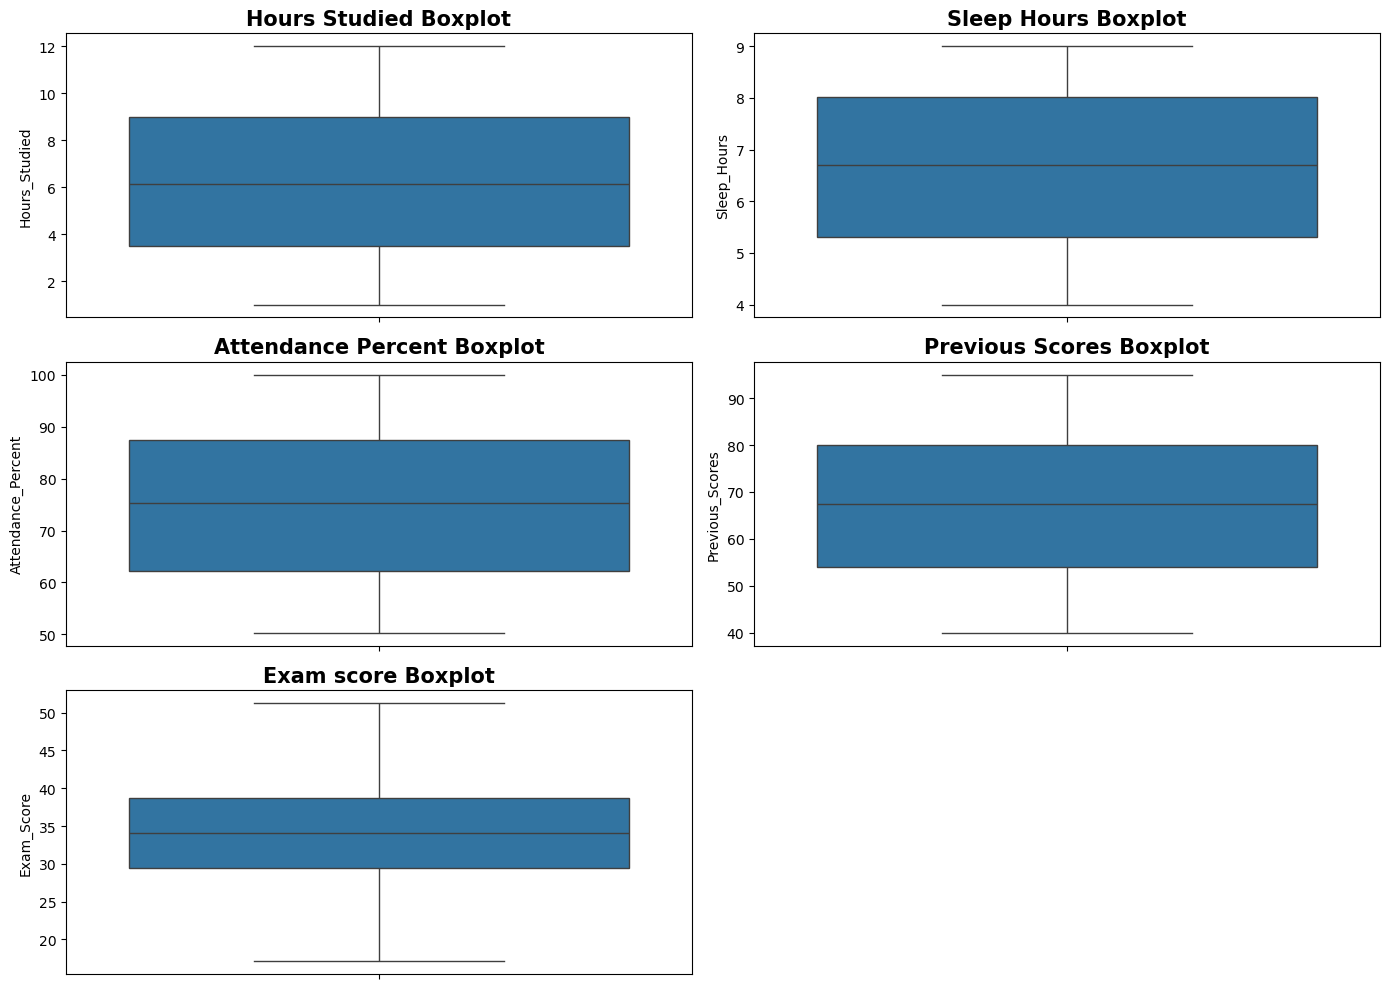

In [38]:
plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
sns.boxplot(data,y='Hours_Studied')
plt.title('Hours Studied Boxplot',fontweight='bold',size=15)


plt.subplot(3,2,2)
sns.boxplot(data,y='Sleep_Hours')
plt.title('Sleep Hours Boxplot',fontweight='bold',size=15)

plt.subplot(3,2,3)
sns.boxplot(data,y='Attendance_Percent')
plt.title('Attendance Percent Boxplot',fontweight='bold',size=15)

plt.subplot(3,2,4)
sns.boxplot(data,y='Previous_Scores')
plt.title('Previous Scores Boxplot',fontweight='bold',size=15)

plt.subplot(3,2,5)
sns.boxplot(data,y='Exam_Score')
plt.title('Exam score Boxplot',fontweight='bold',size=15)

plt.tight_layout()
plt.show()

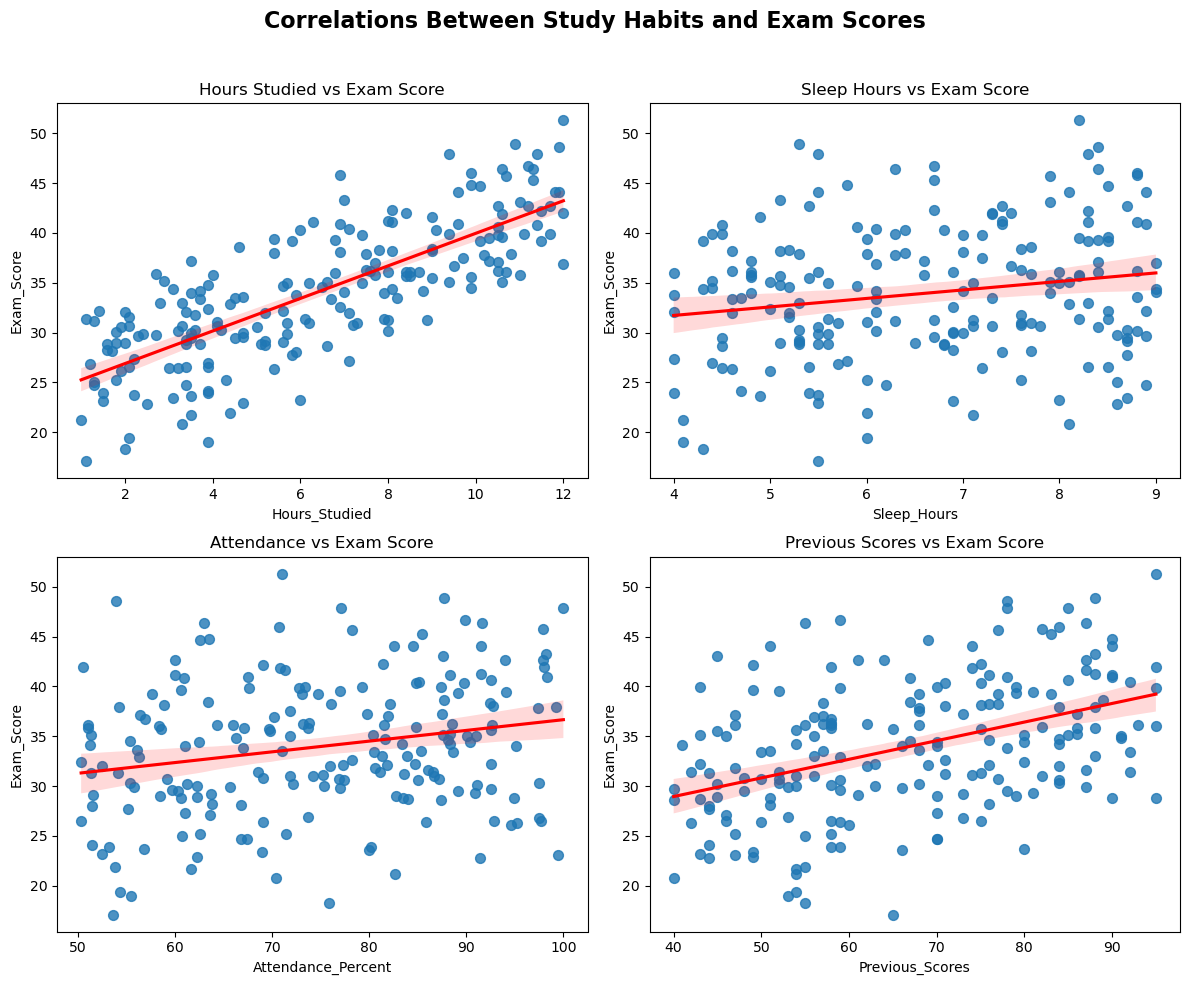

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Hours Studied vs Exam Score
sns.regplot(ax=axes[0,0], x='Hours_Studied', y='Exam_Score', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
axes[0,0].set_title('Hours Studied vs Exam Score')

# 2. Sleep Hours vs Exam Score
sns.regplot(ax=axes[0,1], x='Sleep_Hours', y='Exam_Score', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
axes[0,1].set_title('Sleep Hours vs Exam Score')

# 3. Attendance vs Exam Score
sns.regplot(ax=axes[1,0], x='Attendance_Percent', y='Exam_Score', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
axes[1,0].set_title('Attendance vs Exam Score')

# 4. Previous Scores vs Exam Score
sns.regplot(ax=axes[1,1], x='Previous_Scores', y='Exam_Score', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
axes[1,1].set_title('Previous Scores vs Exam Score')

# Adjust layout
plt.suptitle('Correlations Between Study Habits and Exam Scores', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

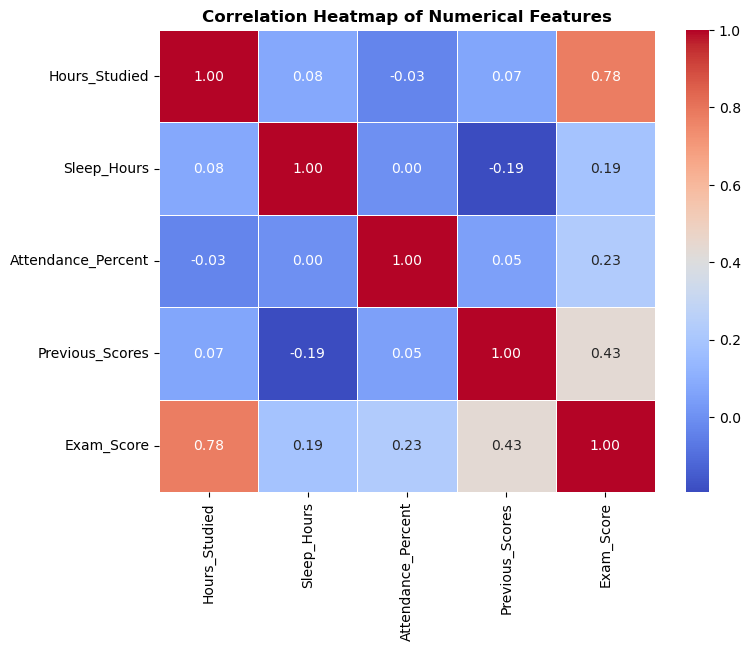

In [40]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontweight='bold')
plt.show()

RandomForest

Linear Regression Performance:
MSE : 7.7618
RMSE: 2.7860
MAE : 2.3109
R²  : 0.8537

 Linear Regression Equation:
Exam_Score = -2.20 + 1.55*Hours_Studied + 0.88*Sleep_Hours + 0.11*Attendance_Percent + 0.18*Previous_Scores

 Coefficient Interpretation:
Hours_Studied           1.549  -->  Positive ↑
Sleep_Hours             0.884  -->  Positive ↑
Attendance_Percent      0.109  -->  Positive ↑
Previous_Scores         0.183  -->  Positive ↑

 Random Forest Performance:
MSE : 10.3444
RMSE: 3.2163
MAE : 2.8327
R²  : 0.8051

================ Model Comparison ================
            Model       MSE     RMSE      MAE       R²
Linear Regression  7.761783 2.785998 2.310858 0.853745
    Random Forest 10.344412 3.216273 2.832704 0.805080


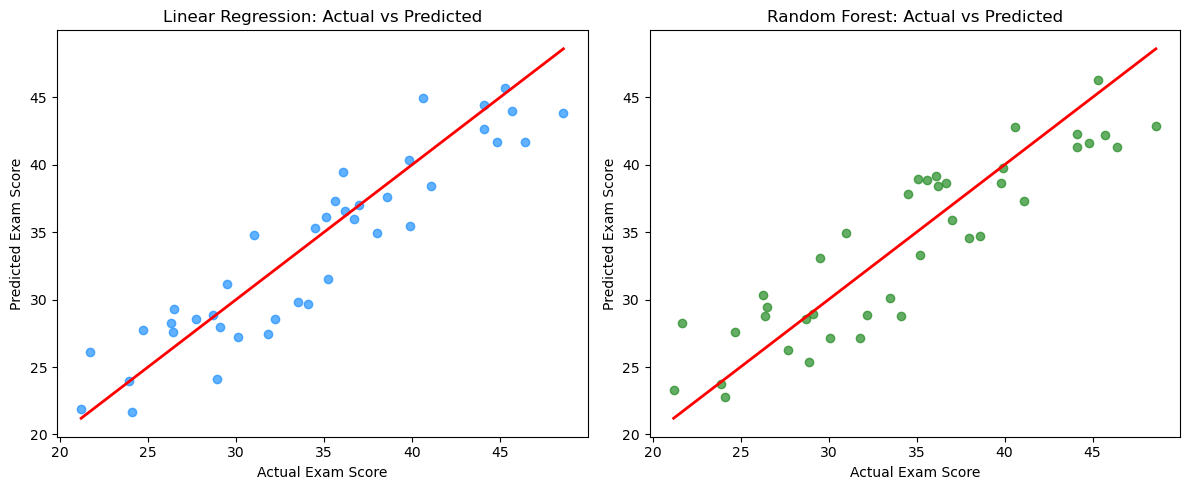


 Random Forest Feature Importances:
Hours_Studied         0.654782
Previous_Scores       0.180298
Attendance_Percent    0.104066
Sleep_Hours           0.060854
dtype: float64


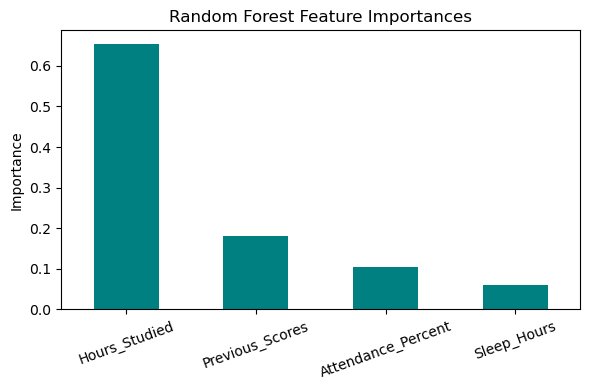

In [41]:
# select the features and target
features = ['Hours_Studied', 'Sleep_Hours', 'Attendance_Percent', 'Previous_Scores']
target = 'Exam_Score'
X = data[features]
y = data[target]

# train the set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# linear one

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr  = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr   = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MSE : {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"R²  : {r2_lr:.4f}")

# Coefficients
coef = pd.Series(lr.coef_, index=features)
print("\n Linear Regression Equation:")
equation = f"Exam_Score = {lr.intercept_:.2f}"
for feature, value in coef.items():
    sign = "+" if value >= 0 else "-"
    equation += f" {sign} {abs(value):.2f}*{feature}"
print(equation)

print("\n Coefficient Interpretation:")
for feature, value in coef.items():
    direction = "Positive ↑" if value > 0 else "Negative ↓"
    print(f"{feature:20s} {value:8.3f}  -->  {direction}")

# forest one
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("\n Random Forest Performance:")
print(f"MSE : {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")
print(f"R²  : {r2_rf:.4f}")

print("\n================ Model Comparison ================")
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf],
    'R²': [r2_lr, r2_rf]
})
print(comparison.to_string(index=False))


# Actual vs Predicted Comparison
plt.figure(figsize=(12,5))

# (1) Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='dodgerblue')
low, high = min(y_test.min(), y_pred_lr.min()), max(y_test.max(), y_pred_lr.max())
plt.plot([low, high], [low, high], color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')

# (2) Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='forestgreen')
low, high = min(y_test.min(), y_pred_rf.min()), max(y_test.max(), y_pred_rf.max())
plt.plot([low, high], [low, high], color='red', linewidth=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')

plt.tight_layout()
plt.show()

fi = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("\n Random Forest Feature Importances:")
print(fi)

plt.figure(figsize=(6,4))
fi.plot(kind='bar', color='teal')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=20)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

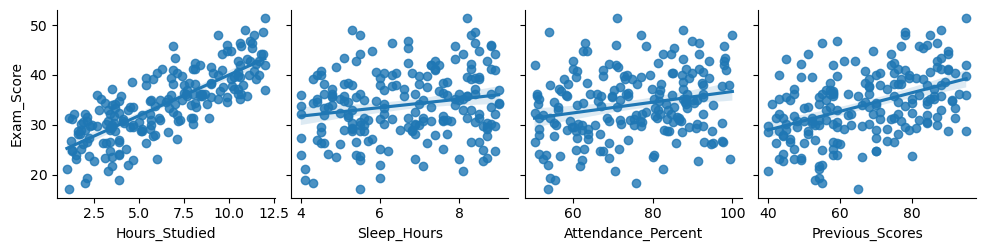

In [42]:
sns.pairplot(data, x_vars=['Hours_Studied','Sleep_Hours','Attendance_Percent','Previous_Scores'], 
             y_vars='Exam_Score', kind='reg')

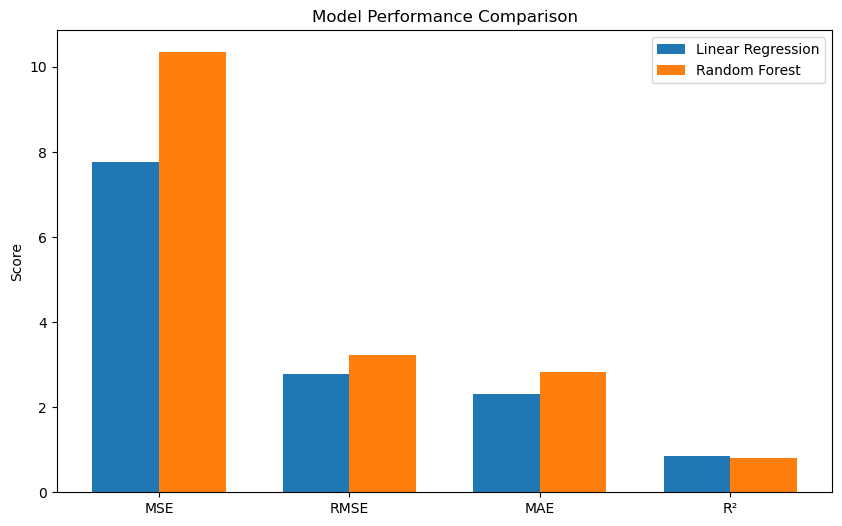

In [43]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
linear = [7.7618, 2.7860, 2.3109, 0.8537]
rf     = [10.3444, 3.2163, 2.8327, 0.8051]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, linear, width, label='Linear Regression')
plt.bar(x + width/2, rf, width, label='Random Forest')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

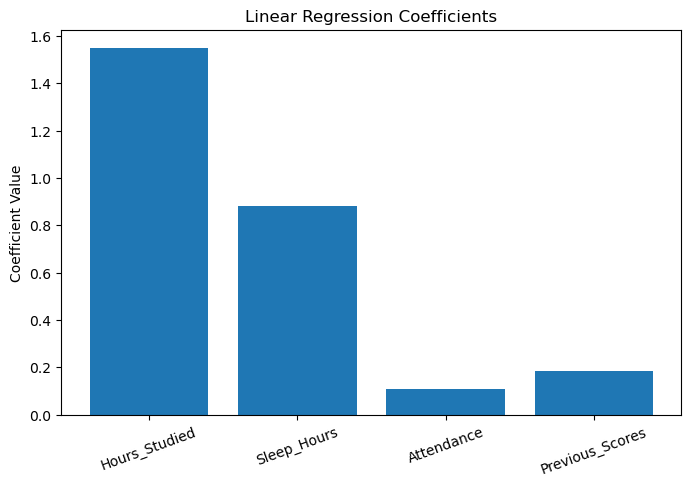

In [44]:
coef = [1.549, 0.884, 0.109, 0.183]
features = ['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Previous_Scores']

plt.figure(figsize=(8,5))
plt.bar(features, coef)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=20)
plt.show()